In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
prot_ori_df = pd.read_csv("/home/scai/PhenPred/data/clines/proteomics.csv",index_col=0).T

In [3]:
prot_imputed_cv_df = pd.read_csv(
    "/home/scai/PhenPred/reports/vae/files/20231023_092657_imputed_proteomics_cvtest.csv.gz",index_col=0)

In [4]:
common_prot = sorted(set(prot_ori_df.columns) & set(prot_imputed_cv_df.columns))
common_samples = sorted(set(prot_ori_df.index) & set(prot_imputed_cv_df.index))
prot_ori_df = prot_ori_df.loc[common_samples, common_prot]
prot_imputed_cv_df = prot_imputed_cv_df.loc[common_samples, common_prot]

In [18]:
prot_corr_df = pd.DataFrame(index=common_prot, columns=["corr", "NRMSE", "count"])
for c in common_prot:
    tmp_df = pd.DataFrame({"ori":prot_ori_df[c], "imputed":prot_imputed_cv_df[c]})
    tmp_df = tmp_df.dropna()
    if len(tmp_df) > 500:
        prot_corr_df.loc[c, "corr"] = tmp_df.corr().iloc[0,1]
        prot_corr_df.loc[c, "NRMSE"] = np.sqrt(np.mean((tmp_df["ori"]-tmp_df["imputed"])**2))/np.mean(tmp_df["ori"])
        prot_corr_df.loc[c, "count"] = len(tmp_df)

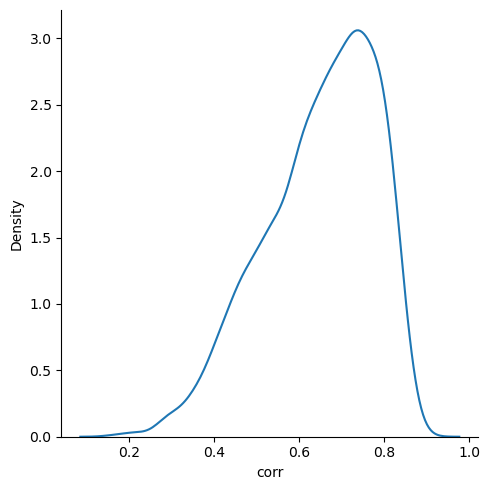

In [20]:
sns.displot(prot_corr_df, x="corr", kind="kde")

In [19]:
print(prot_corr_df["corr"].median())

0.6700851637326778


In [32]:
prot_ori_df

GeneSymbol,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AARS2,AARSD1,AASDHPPT,...,ZNF830,ZNHIT2,ZNRD2,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX
SIDM00018,3.69780,NaN,3.41143,3.34025,1.73833,3.14375,5.44290,3.93768,3.09449,4.95292,...,NaN,2.36218,3.73305,NaN,4.66696,5.82273,2.96899,2.24598,2.10489,6.22679
SIDM00023,3.98044,NaN,NaN,2.39579,NaN,NaN,5.65001,3.62450,NaN,3.83920,...,1.72786,NaN,NaN,3.96389,2.18918,4.00953,2.87247,NaN,NaN,3.12171
SIDM00040,3.04338,2.60084,3.72101,2.84337,2.12635,2.81196,6.90948,2.47011,3.94738,4.44959,...,1.55235,3.20510,5.67014,NaN,5.35105,4.74386,2.49258,NaN,NaN,5.11104
SIDM00041,3.50822,NaN,NaN,4.17959,2.90733,NaN,6.10072,3.90864,3.21437,3.67106,...,NaN,NaN,4.97267,NaN,4.60495,4.94886,2.74363,NaN,NaN,7.00561
SIDM00042,3.30559,NaN,NaN,NaN,NaN,NaN,NaN,3.70681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.21982,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM01248,2.73729,NaN,3.58698,3.26968,NaN,2.76427,6.69445,3.19636,3.46615,4.00781,...,NaN,NaN,4.83395,NaN,4.64494,4.67513,2.74816,NaN,2.71830,5.40782
SIDM01251,2.67397,2.80895,3.68147,3.53816,2.29184,3.51558,5.82631,3.30585,3.97649,4.15570,...,1.25402,2.40243,4.58917,2.82590,4.19836,4.83970,1.81224,1.98577,1.70643,6.30450
SIDM01259,2.66024,2.66699,3.95102,NaN,1.27767,3.00286,6.59789,2.78769,4.73269,3.99927,...,NaN,NaN,5.22947,3.58432,5.17588,5.30529,2.92862,NaN,2.56982,2.65551
SIDM01261,NaN,3.44221,4.10067,NaN,2.83540,3.33395,7.86792,3.27017,3.60406,3.90408,...,NaN,NaN,4.83770,5.31447,4.13042,3.47256,2.95688,NaN,NaN,3.90316


In [31]:
prot_imputed_cv_df

,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AARS2,AARSD1,AASDHPPT,...,ZNF830,ZNHIT2,ZNRD2,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX
SIDM00018,3.14548,2.57793,3.43744,3.55843,2.63221,3.77881,6.22137,3.33532,3.98577,4.50347,...,1.28301,2.82282,4.21874,3.60074,4.66710,5.21710,2.52990,2.12451,2.16800,6.15376
SIDM00023,3.62886,2.73483,3.07654,3.25097,2.73234,2.49330,5.72909,3.51419,2.99672,3.16108,...,1.22416,2.02700,3.95169,3.52867,2.82256,4.12192,2.56786,1.85785,2.21136,3.75913
SIDM00040,3.35202,2.62069,3.54474,3.08511,2.29914,3.07871,6.46112,3.39113,3.31542,3.88330,...,0.65769,2.47168,5.20356,3.54172,4.17904,4.35080,2.57873,2.21160,2.41368,4.71352
SIDM00041,3.46861,2.66329,3.32455,3.46290,2.57115,2.98637,6.10887,3.74182,3.31834,3.89345,...,0.77132,2.20820,4.43965,3.59175,3.93339,4.51622,2.66920,2.18868,2.34682,5.40747
SIDM00042,3.41072,2.15656,2.91043,2.74858,2.16647,2.97259,3.79730,3.45592,2.11047,1.97677,...,0.71308,1.64313,3.42614,2.34104,1.97743,3.02239,2.23765,1.70470,2.02358,2.97054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM01248,3.74796,2.39147,3.09516,3.38773,2.35054,2.88135,5.59293,3.78739,2.83022,3.54001,...,0.67284,2.19218,4.58152,3.23971,4.19458,4.51565,2.59112,2.17649,2.44849,6.25354
SIDM01251,2.99882,2.38864,3.66861,3.24533,2.34833,3.28263,6.16622,3.17957,3.60950,4.22417,...,0.77918,2.41890,4.51011,3.47223,4.41610,4.87714,2.29254,2.18752,2.11197,4.10642
SIDM01259,2.97481,2.40295,3.89304,2.91689,2.08333,3.39868,7.06294,2.96775,4.27102,4.57890,...,0.77319,2.52003,4.78488,3.41793,4.60052,5.29450,2.19555,2.43869,2.31672,3.44264
SIDM01261,2.86942,3.14655,4.00482,3.63687,3.05695,3.52847,6.75352,3.53527,3.57297,3.79919,...,0.60469,2.22673,5.27518,4.37029,4.13375,4.29446,2.64916,2.31219,2.82106,5.22604
